### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Suppress all warnings
warnings.filterwarnings("ignore")

### Data Loading 

In [2]:
df = pd.read_csv('footfalls.csv')

In [3]:
df.head()

Month  Footfalls  t  log_footfalls  t_square  Jan  Feb  Mar  Apr  May  \
0  Jan-91       1709  1       7.443664         1    1    0    0    0    0   
1  Feb-91       1621  2       7.390799         4    0    1    0    0    0   
2  Mar-91       1973  3       7.587311         9    0    0    1    0    0   
3  Apr-91       1812  4       7.502186        16    0    0    0    1    0   
4  May-91       1975  5       7.588324        25    0    0    0    0    1   

   Jun  Jul  Aug  Sep  Oct  Nov  Dec  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y').dt.to_period('M')
df['Month'] = df['Month'].astype(str)
df

Month  Footfalls    t  log_footfalls  t_square  Jan  Feb  Mar  Apr  \
0    1991-01       1709    1       7.443664         1    1    0    0    0   
1    1991-02       1621    2       7.390799         4    0    1    0    0   
2    1991-03       1973    3       7.587311         9    0    0    1    0   
3    1991-04       1812    4       7.502186        16    0    0    0    1   
4    1991-05       1975    5       7.588324        25    0    0    0    0   
..       ...        ...  ...            ...       ...  ...  ...  ...  ...   
154  2003-11       2076  155       7.638198     24025    0    0    0    0   
155  2003-12       2141  156       7.669028     24336    0    0    0    0   
156  2004-01       1832  157       7.513164     24649    1    0    0    0   
157  2004-02       1838  158       7.516433     24964    0    1    0    0   
158  2004-03       2132  159       7.664816     25281    0    0    1    0   

     May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  
0      0    0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0    0  
4      1    0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  ...  
154    0    0    0    0    0    0    1    0  
155    0    0    0    0    0    0    0    1  
156    0    0    0    0    0    0    0    0  
157    0    0    0    0    0    0    0    0  
158    0    0    0    0    0    0    0    0  

[159 rows x 17 columns]

In [5]:
colum_to_retain=['Month', 'Footfalls']
df=df[colum_to_retain]
df

Month  Footfalls
0    1991-01       1709
1    1991-02       1621
2    1991-03       1973
3    1991-04       1812
4    1991-05       1975
..       ...        ...
154  2003-11       2076
155  2003-12       2141
156  2004-01       1832
157  2004-02       1838
158  2004-03       2132

[159 rows x 2 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      159 non-null    object
 1   Footfalls  159 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [7]:
df.isnull().sum()

Month        0
Footfalls    0
dtype: int64

In [8]:
df.describe()

Footfalls
count   159.000000
mean   1822.226415
std     181.601732
min    1361.000000
25%    1698.500000
50%    1831.000000
75%    1967.000000
max    2223.000000

# EDA

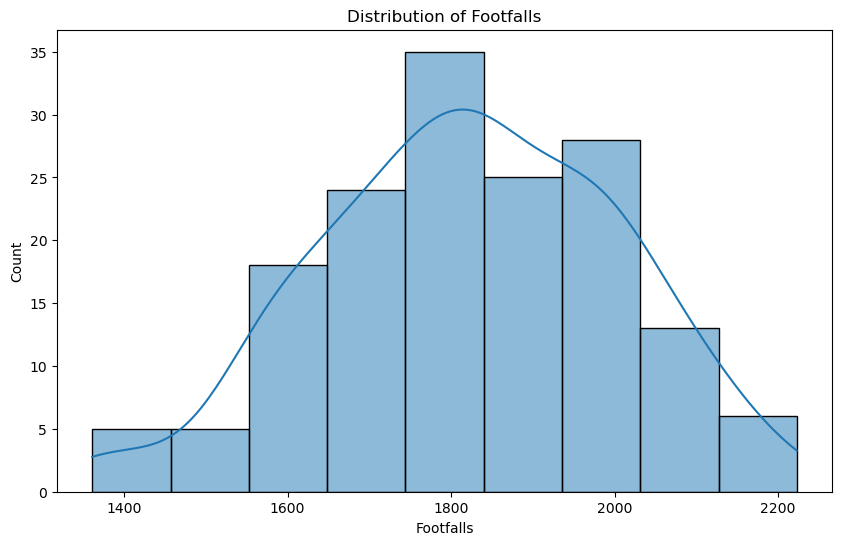

In [9]:
# Plotting the distribution of 'Footfalls'
plt.figure(figsize=(10, 6))
sns.histplot(df['Footfalls'], kde=True)
plt.title('Distribution of Footfalls')
plt.show()

### checking which decomposition to use

In [10]:
#  Perform additive decomposition
result_additive = seasonal_decompose(df['Footfalls'], model='additive', period=12)
residuals_additive = result_additive.resid.dropna()  # Drop NaN values if any

# Perform multiplicative decomposition
result_multiplicative = seasonal_decompose(df['Footfalls'], model='multiplicative', period=12)
residuals_multiplicative = result_multiplicative.resid.dropna()  # Drop NaN values if any

# Calculate variance of residuals for both models
variance_additive = residuals_additive.var()
variance_multiplicative = residuals_multiplicative.var()

# Compare variances
print("Variance of Additive Residuals:", variance_additive)
print("Variance of Multiplicative Residuals:", variance_multiplicative)

# Choose the model with smaller variance (lower variance often indicates a better fit)
if variance_additive < variance_multiplicative:
    print("Additive decomposition might be more suitable.")
elif variance_multiplicative < variance_additive:
    print("Multiplicative decomposition might be more suitable.")
else:
    print("Both models have similar variances. Further analysis might be needed.")

Variance of Additive Residuals: 2468.0133649912905
Variance of Multiplicative Residuals: 0.0008092477053226227
Multiplicative decomposition might be more suitable.


### performing seasonal_decompose

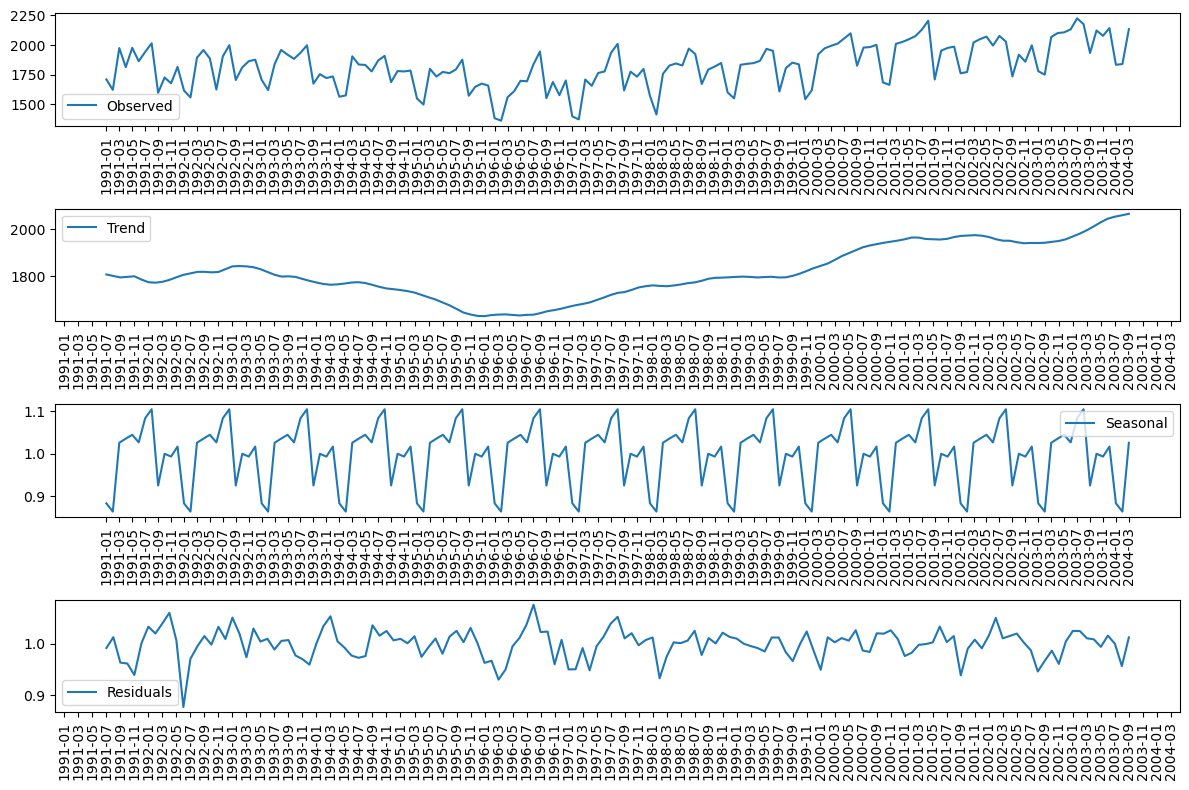

In [9]:
# Decomposing the time series into trend, seasonal, and residual components
result = seasonal_decompose(df['Footfalls'], model='multiplicative', period=12)  # Assuming seasonality is 12 months

# Plotting decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Month'], result.observed, label='Observed')
plt.xticks(df['Month'][::2])
plt.xticks(rotation=90)
plt.legend()

plt.subplot(412)
plt.plot(df['Month'], result.trend, label='Trend')
plt.xticks(df['Month'][::2])
plt.xticks(rotation=90)
plt.legend()

plt.subplot(413)
plt.plot(df['Month'], result.seasonal, label='Seasonal')
plt.xticks(df['Month'][::2])
plt.xticks(rotation=90)
plt.legend()

plt.subplot(414)
plt.plot(df['Month'], result.resid, label='Residuals')
plt.xticks(df['Month'][::2])
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

### from the above plot we can see that current timeseries data is affected by seasonlity, trend and residuals which means the given timeseries data is not stationary

### performing stationarity check using Dickey-Fuller test

ADF Statistic: -0.23499112877864636
p-value: 0.9342202042969313


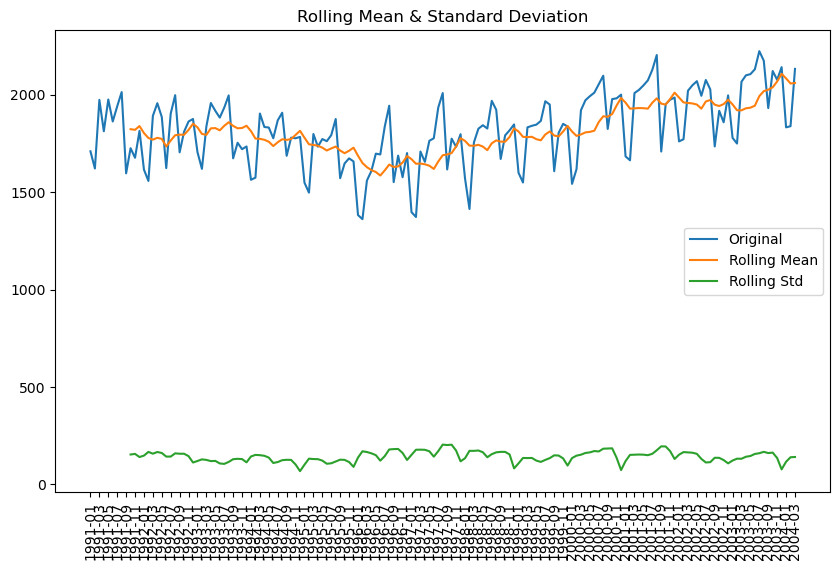

In [10]:

# Check for stationarity using Dickey-Fuller test

result = adfuller(df['Footfalls'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot rolling statistics using the entire dataset
rolling_mean = df['Footfalls'].rolling(window=10).mean()
rolling_std = df['Footfalls'].rolling(window=10).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Footfalls'], label='Original')
plt.plot(df['Month'], rolling_mean, label='Rolling Mean')
plt.plot(df['Month'], rolling_std, label='Rolling Std')
plt.xticks(df['Month'][::2])
plt.xticks(rotation=90)
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


### The ADF statistic is less negative and the p-value is high (above the typical significance level of 0.05). This suggests that we fail to reject the null hypothesis of the presence of a unit root, indicating that the series might be non-stationary

### performing steps to make data stationary

ADF Statistic: -3.326842715430073
p-value: 0.013720419909833999


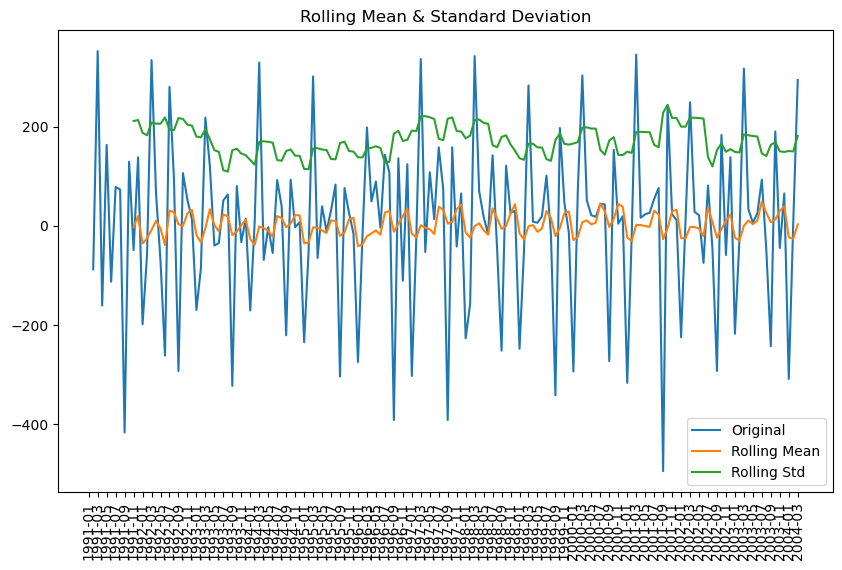

In [11]:

# Taking the first difference
df['Footfalls_diff'] = df['Footfalls'].diff()

# Perform ADF test on the differenced series
result = adfuller(df['Footfalls_diff'].dropna())  # Ensure dropping NaNs from differenced series
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot rolling statistics for the original 'Footfalls' series
rolling_mean = df['Footfalls_diff'].rolling(window=10).mean()
rolling_std = df['Footfalls_diff'].rolling(window=10).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Footfalls_diff'], label='Original')
plt.plot(df['Month'], rolling_mean, label='Rolling Mean')
plt.plot(df['Month'], rolling_std, label='Rolling Std')
plt.xticks(df['Month'][::2], rotation=90)
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

### The ADF statistic is more negative, and the p-value is low (below 0.05). This suggests strong evidence against the null hypothesis of a unit root, indicating that the series is likely stationary

### plotting ACF anf PACF 

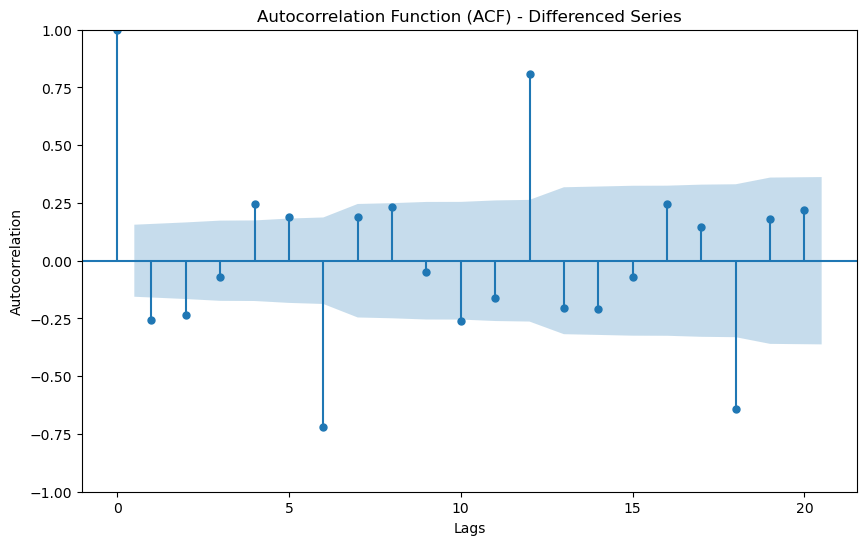

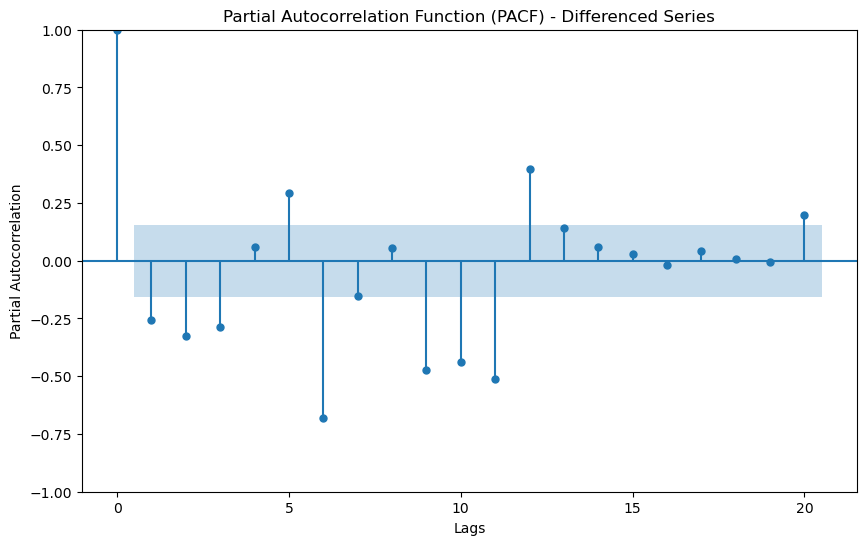

In [12]:

# Plot ACF for the differenced series
plt.figure(figsize=(10, 6))
plot_acf(df['Footfalls_diff'].dropna(), lags=20, ax=plt.gca())  # Adjust 'lags' as needed
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) - Differenced Series')
plt.show()

# Plot PACF for the differenced series
plt.figure(figsize=(10, 6))
plot_pacf(df['Footfalls_diff'].dropna(), lags=20, ax=plt.gca())  # Adjust 'lags' as needed
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) - Differenced Series')
plt.show()

### Traning the model

RMSE: 253.78735562202152


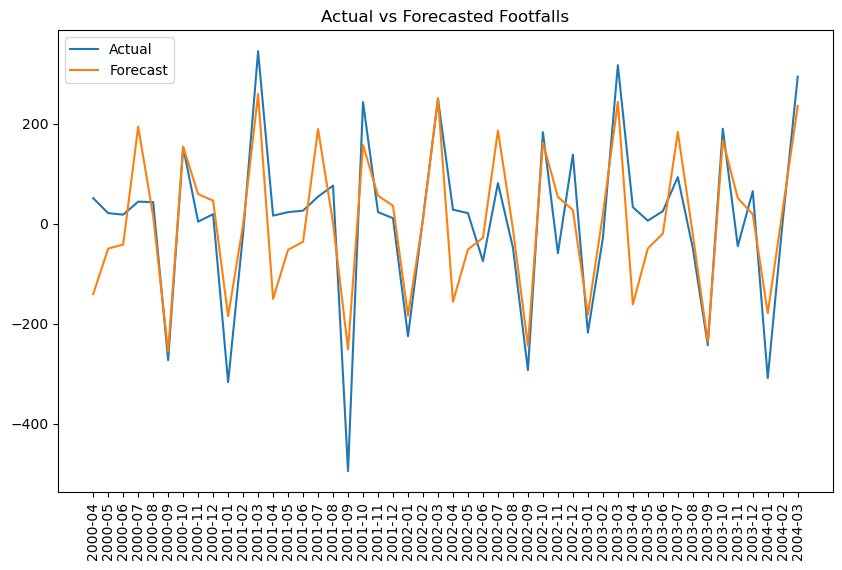

In [14]:
# Splitting the data into training and testing sets AFTER ADF test
df.dropna(subset=['Footfalls_diff'], inplace=True)
train_size = int(len(df) * 0.7)
train_data = df[:train_size]
test_data = df[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['Footfalls_diff'], order=(5, 0, 5))  # ARIMA parameters to be adjusted
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(np.mean((forecast - test_data['Footfalls_diff'])**2))
print('RMSE:', rmse)

# Plot predicted values against actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Month'], test_data['Footfalls_diff'], label='Actual')
plt.plot(test_data['Month'], forecast, label='Forecast')
plt.xticks(rotation=90)
plt.legend()
plt.title('Actual vs Forecasted Footfalls')
plt.show()

In [23]:
# Forecasting for the next 10 months in differenced scale
forecasted_values_diff = model_fit.forecast(steps=10)

if isinstance(forecasted_values_diff, pd.Series):
    forecasted_values_diff = forecasted_values_diff.values  # Convert Series to array

# Reverse differencing to obtain forecasts in the original scale
if len(df) > 0:
    last_footfall = df['Footfalls'].iloc[-1]  # Get the last known 'Footfalls' value
    
    # Cumulative sum of forecasted differences starting from the last known 'Footfalls' value
    forecasted_values = pd.Series(forecasted_values_diff).cumsum() + last_footfall
    
last_date= df['Month'].iloc[-1]
    # Generate the next 10 months from the last date in the DataFrame
next_months = pd.date_range(last_date, periods=11, freq='M')[1:]  # Start from the month after the last date
next_months_formatted = next_months.strftime('%b-%y')

  # Convert the forecasted values and the month_list into a DataFrame
forecast_df = pd.DataFrame({
    'Month': next_months_formatted,
    'Predicted Footfall': forecasted_values
})
    
forecast_df

Month  Predicted Footfall
0  Apr-04         1991.192120
1  May-04         1941.302759
2  Jun-04         1899.587228
3  Jul-04         2093.491551
4  Aug-04         2108.598330
5  Sep-04         1852.674935
6  Oct-04         2006.773654
7  Nov-04         2065.754212
8  Dec-04         2111.859414
9  Jan-05         1926.906040

### Conclusion

#### The model developed for forecasting footfall demonstrates a moderate level of accuracy, as indicated by the RMSE of 253.79. The close alignment between the predicted and actual footfall values on the graph suggests that the model adequately captures the observed patterns in the dataset. While the model provides reasonable forecasts.